## MNIST handwritting recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# scipy.special library for sigmoid function expit()
import scipy.special
# "imageio" help load data from PNG image files
import imageio
# "glob" helps select multiple files using pattern
import glob

%matplotlib inline

## Neural network model

In [2]:
# Neural network class definition
class neuralNetwork:
    
    # Initialize the neural network
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        # Set # of nodes in input, hidden and output layer
        self.iNodes = inputNodes
        self.hNodes = hiddenNodes
        self.oNodes = outputNodes
        
        # (Experience of choosing weights) Sample weights centred around zero and std = 1/sqrt(#_of_incoming_nodes)
        self.wih = np.random.normal(loc=0.0, scale=pow(self.iNodes, -0.5),
                                    size=(self.hNodes, self.iNodes))
        self.who = np.random.normal(loc=0.0, scale=pow(self.hNodes, -0.5),
                                    size=(self.oNodes, self.hNodes))
        # Set learning rate
        self.lr = learningRate
        # Set the activation function (sigmoid funct)
        self.activation_function = lambda x: scipy.special.expit(x)
        pass 
    
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # Convert both inputs to at least 2d array
        inputs = np.array(inputs_list,
                          ndmin=2).T
        targets = np.array(targets_list,
                           ndmin=2).T
        
        # Calculate the signals into the hidden layer
        hidden_inputs = np.dot(self.wih,
                               inputs)
        # Calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Calculate the signals into the hidden layer
        final_inputs = np.dot(self.who,
                              hidden_outputs)
        # Calculate the signals emerging from hidden layer
        final_outputs = self.activation_function(final_inputs)
        
        # The heart of neural network, improving the weights base on the error between caculated and target outputs (back propagation)
        # Error_output = target - actual
        output_error = targets - final_outputs
        # Hidden error is the output_error, spliting by weight and recombing at hidden nodes (???????)
        hidden_error = np.dot(self.who.T,
                              output_error)
        # Update weights for links between hidden and output layers
        self.who += self.lr * np.dot((output_error * final_outputs * (1.0-final_outputs)),
                                     np.transpose(hidden_outputs))  
        # Update weights for links between input and hidden layers
        self.wih += self.lr * np.dot((hidden_error * hidden_outputs * (1.0-hidden_outputs)),
                                    np.transpose(inputs))
        pass
    
    
    # Return output nodes after inputting the input nodes 
    def query(self, inputs_list):
        # Convert the input list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T  # For appropriate term
        
        # Calculate the signals into the hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # Calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Calculate the signals into the hidden layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # Calculate the signals emerging from hidden layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

### Introduce some initial value

In [3]:
# Number of input node, hidden nodes and output nodes
input_nodes = 784 # 28*28
hidden_nodes = 100
output_nodes = 10

# Learning rate
learning_rate = 0.1

# Create instance of neural network
mnist_model = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

### Load MNIST training data csv

In [4]:
train_data_file = open("data/mnist_train.csv", "r")
train_data_list = train_data_file.readlines()[1:]
train_data_file.close()

### Train neural network model

- **"Epoch"**: The number of time running through the entire training data set 

In [5]:
# epochs is the number of times the training data set is used for  training 
epochs = 5

for e in range(epochs):
    for record in train_data_list:
        # Split record by ','
        all_value = record.split(',')
        # Scale and shift input to appropriate value for model
        inputs = (np.asfarray(all_value[1:]) / 255.0 * 0.99) + 0.01
        # Create target output value 
        targets = np.zeros(output_nodes) + 0.01
        # all_value[0] is the "target output" for training data
        targets[int(all_value[0])] = 0.99
        # Train model
        mnist_model.train(inputs, targets)
        pass 
    pass

    
# (NOTE) Input must be array shape (1*784) appropriate to model
# (NOTE) "Target" must have same size as output nodes

### Load MNIS testing data

In [8]:
test_data_file = open("data/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()[1:]
test_data_file.close()

### Test the testing data

**"Scorecard"** save the result of applying testing data to MNIST model 
- *Scorecard = 1* if the prediction is right 
- *Scorecard = 0* otherwise

In [9]:
# Scorecard for how well the network perform
scorecard = []

In [10]:
for test_record in test_data_list:
    # Split the record ","
    all_values = test_record.split(",")
    # Correct answer is first value in list
    correct_label = int(all_values[0])
    # Scale and shift the inputs to array
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # Query the network
    output = mnist_model.query(inputs)
    # The index of highest value corresponds to the label
    label = np.argmax(output)  # Take index of highest value in list
    # 1 for matched correct answer; 0 for not matched correct answer 
    if (label == correct_label) :
        scorecard.append(1)
    else:
        scorecard.append(0)

### Calculate the "Performance" score

In [14]:
# Calculate the "Performance" of model
scorecard_array = np.array(scorecard)
performance = scorecard_array.sum() / scorecard_array.size
print(f"Performance = {performance*100}%")

Performance = 96.67%


## Some improvement for my model

- Using **"Epochs"** to train multiple time
<br>
- Modify **"learning rate"** of the model
<br>
- Changing the **shape of network** --> The number of nodes in hidden layer (This is the place where the model actually learns)

#### Plotting data

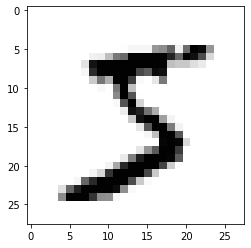

In [36]:
all_values = train_data_list[0].split(",")
# Transform list of str to array of real numbers, reshape them
image_array = np.asfarray(all_values[1:]).reshape((28,28))
# Create an image from array
plt.imshow(image_array, cmap="Greys", interpolation=None)

- **"np.asfarray(list)"**: transform string to real number and create an array for those number
<br>
- **"plt.imshow(data, cmap=)"**: Create an image from 2-dimensional array with color "cmap"

#### Preparing the MNIST Training Data

- First need to rescale the input color value from 0 - 255 to 0.01 - 1.0
<br>
- I choose 0.01 not 0.0 because "*Zero value inputs can artificially kill weight updates*"

In [38]:
# Update input value for training
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
scaled_input

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

In [39]:
# Update output value for training
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[0] = 0.99

In [40]:
targets

array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

## Loading real time images of handwritten & test them

### Read and decode list of ".png" data to list of arrays

In [16]:
# Our own image test data set
our_own_dataset = []

In [17]:
# Reading multiple ".png" files
for image_file_name in glob.glob("data_my_model/2828_my_own_?.png"):
    # Load from png's image into an array
    img_array = imageio.imread(image_file_name, as_gray=True)
    # Use file's name to set the correct label
    label = int(image_file_name[-5:-4])
    # Reshape image to list of 784 units, invert values
    img_data = 255.0 - img_array.reshape(784)
    # Scale them to 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    # Combined label and image data
    record = np.append(label, img_data)
    # Add record to list of data's array
    our_own_dataset.append(record)

### Go through each array and test them by network model

[[1.33924435e-03]
 [2.58644712e-02]
 [4.75843683e-01]
 [1.40963337e-02]
 [6.90194486e-03]
 [9.14306325e-04]
 [2.88295043e-05]
 [2.93831035e-01]
 [2.51421884e-04]
 [9.23955832e-03]]
The predicted value is  2
The true value is  2.0


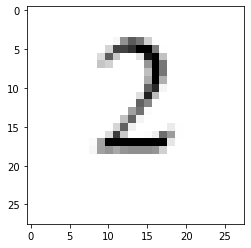

In [16]:
# Test array pic using model
output = mnist_model.query(our_own_dataset[0][1:])
print(output)
# Print the predict value
print("The predicted value is ", str(np.argmax(output)))
# Print the correct value
print("The true value is ", our_own_dataset[0][0])
# Reshape them
image_array = our_own_dataset[0][1:].reshape((28,28))
# Create an image from array
plt.imshow(image_array, cmap="Greys", interpolation=None)

[[9.05006133e-04]
 [1.90840019e-02]
 [7.13120017e-04]
 [9.80167809e-01]
 [1.10837882e-03]
 [2.56448886e-02]
 [2.41176602e-04]
 [8.41526516e-04]
 [3.04384957e-04]
 [3.79648298e-03]]
The predicted value is  3
The true value is  3.0


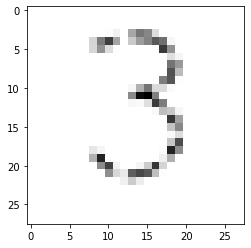

In [17]:
# Test array pic using model
output = mnist_model.query(our_own_dataset[1][1:])
print(output)
# Print the predict value
print("The predicted value is ", str(np.argmax(output)))
# Print the correct value
print("The true value is ", our_own_dataset[1][0])
# Reshape them
image_array = our_own_dataset[1][1:].reshape((28,28))
# Create an image from array
plt.imshow(image_array, cmap="Greys", interpolation=None)

[[6.69345125e-04]
 [1.32791741e-03]
 [3.07986200e-03]
 [4.53829775e-04]
 [9.79793571e-01]
 [9.31323496e-03]
 [4.72865176e-03]
 [7.37356486e-03]
 [1.01658153e-04]
 [7.00848393e-04]]
The predicted value is  4
The true value is  4.0


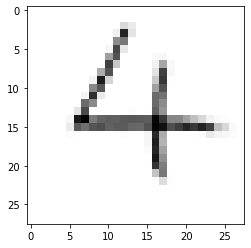

In [18]:
# Test array pic using model
output = mnist_model.query(our_own_dataset[2][1:])
print(output)
# Print the predict value
print("The predicted value is ", str(np.argmax(output)))
# Print the correct value
print("The true value is ", our_own_dataset[2][0])
# Reshape them
image_array = our_own_dataset[2][1:].reshape((28,28))
# Create an image from array
plt.imshow(image_array, cmap="Greys", interpolation=None)

[[5.70815040e-03]
 [4.57052228e-04]
 [7.79083561e-03]
 [5.56555795e-03]
 [5.07433772e-04]
 [9.55383807e-01]
 [3.70416807e-03]
 [5.25741390e-02]
 [6.58715001e-05]
 [3.42125254e-03]]
The predicted value is  5
The true value is  5.0


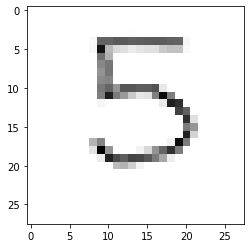

In [19]:
# Test array pic using model
output = mnist_model.query(our_own_dataset[3][1:])
print(output)
# Print the predict value
print("The predicted value is ", str(np.argmax(output)))
# Print the correct value
print("The true value is ", our_own_dataset[3][0])
# Reshape them
image_array = our_own_dataset[3][1:].reshape((28,28))
# Create an image from array
plt.imshow(image_array, cmap="Greys", interpolation=None)

[[0.00393324]
 [0.01519588]
 [0.00027631]
 [0.01349423]
 [0.03825791]
 [0.01782924]
 [0.16845359]
 [0.00937808]
 [0.00169533]
 [0.0022846 ]]
The predicted value is  6
The true value is  6.0


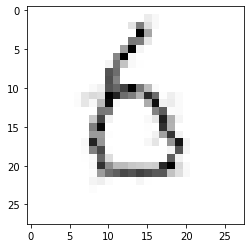

In [20]:
# Test array pic using model
output = mnist_model.query(our_own_dataset[4][1:])
print(output)
# Print the predict value
print("The predicted value is ", str(np.argmax(output)))
# Print the correct value
print("The true value is ", our_own_dataset[4][0])
# Reshape them
image_array = our_own_dataset[4][1:].reshape((28,28))
# Create an image from array
plt.imshow(image_array, cmap="Greys", interpolation=None)